In [74]:
import numpy as np
from skimage import io, data, transform, util, filters, color, io
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_float64, img_as_ubyte
from scipy import ndimage

In [75]:
def show(img_list, caption_list, Axis=False, rescale = True):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        if rescale:
            ax[i].imshow(img_list[i], cmap='gray')
        else:
            ax[i].imshow(img_list[i], cmap='gray', vmin=0, vmax=255)
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

### Filtro Kuwahara

In [76]:
def kuwahara(img, k):
    
    img_cp = util.img_as_float( img )
    nimg = np.copy(img_cp)
    lin, col = img.shape[:2]

    blocos = [None] * 4
    medias = np.zeros((4))
    vars = np.zeros((4))

    for i in range(k-1, lin-(k-1)):
        for j in range(k-1, col-(k-1)):
            blocos[0] = img_cp[i-(k-1):i+1, j-(k-1):j+1]
            blocos[1] = img_cp[i-(k-1):i+1, j:j+k]
            blocos[2] = img_cp[i:i+k, j-(k-1):j+1]
            blocos[3] = img_cp[i:i+k, j:j+k]

            for k in range(4):
                bloco_numpy = np.array( blocos[k] )
                medias[k] = np.mean(bloco_numpy)
                vars[k] = np.var(bloco_numpy)
            pos = np.argmin(vars)
            nimg[i,j] = medias[pos]
    return nimg

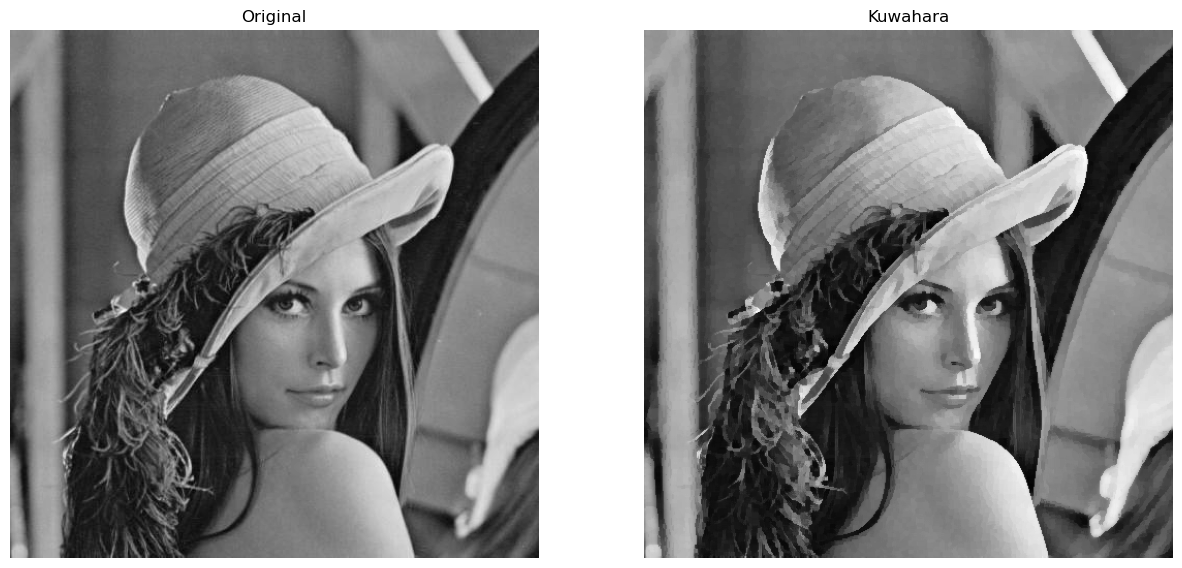

In [77]:
img = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lenna_gray512.png',as_gray=True)
kuw_img = kuwahara(img, k=3)
show([img, kuw_img], ['Original', 'Kuwahara'])

# Filtro Bilateral - Skimage

In [79]:
from skimage.morphology import disk
from skimage.filters.rank import mean_bilateral

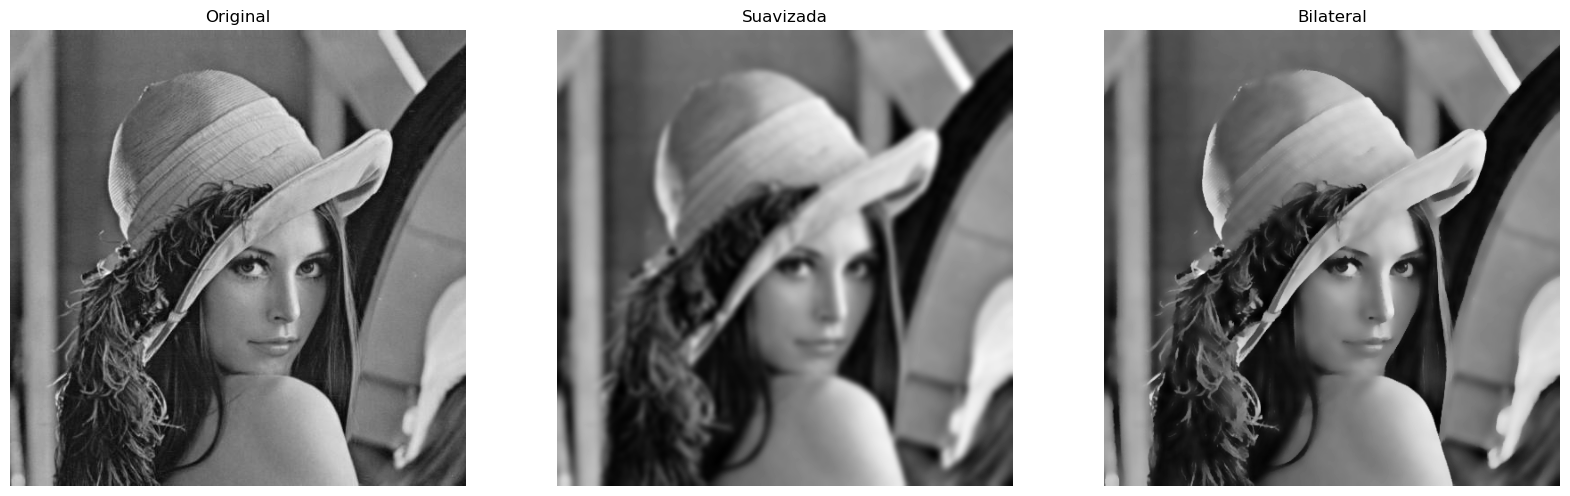

In [80]:
img = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lenna_gray512.png',as_gray=True)
bilat_img = mean_bilateral(img, disk(5), s0=50, s1=30)
fimg = filters.gaussian(img, sigma=3, mode='mirror')
show([img, fimg, bilat_img], ['Original', 'Suavizada', 'Bilateral'])


# Moda

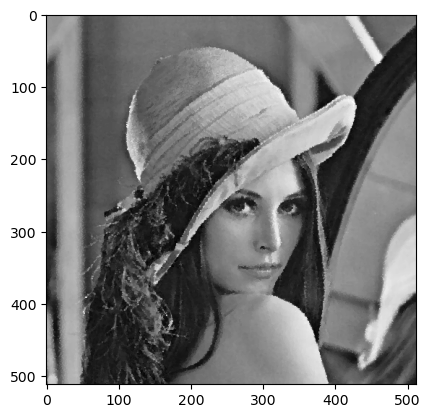

In [74]:
footprint = np.ones( (3,3) )
nimg = filters.rank.modal(img, footprint=footprint)
plt.imshow(nimg, cmap='gray')

# Filtro min

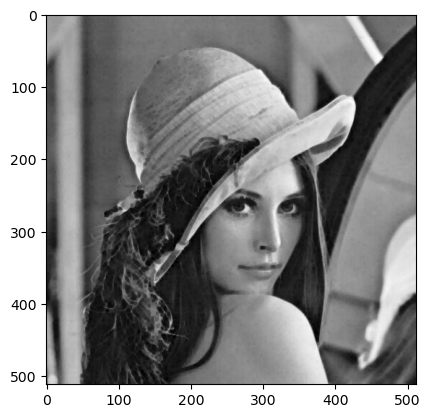

In [75]:
footprint = np.ones( (3,3) )
nimg = filters.rank.minimum(img, footprint=footprint)
plt.imshow(nimg, cmap='gray')

# Filtro Max

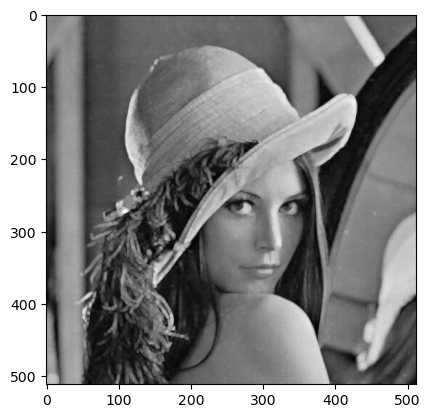

In [76]:
footprint = np.ones( (3,3) )
nimg = filters.rank.maximum(img, footprint=footprint)
plt.imshow(nimg, cmap='gray')

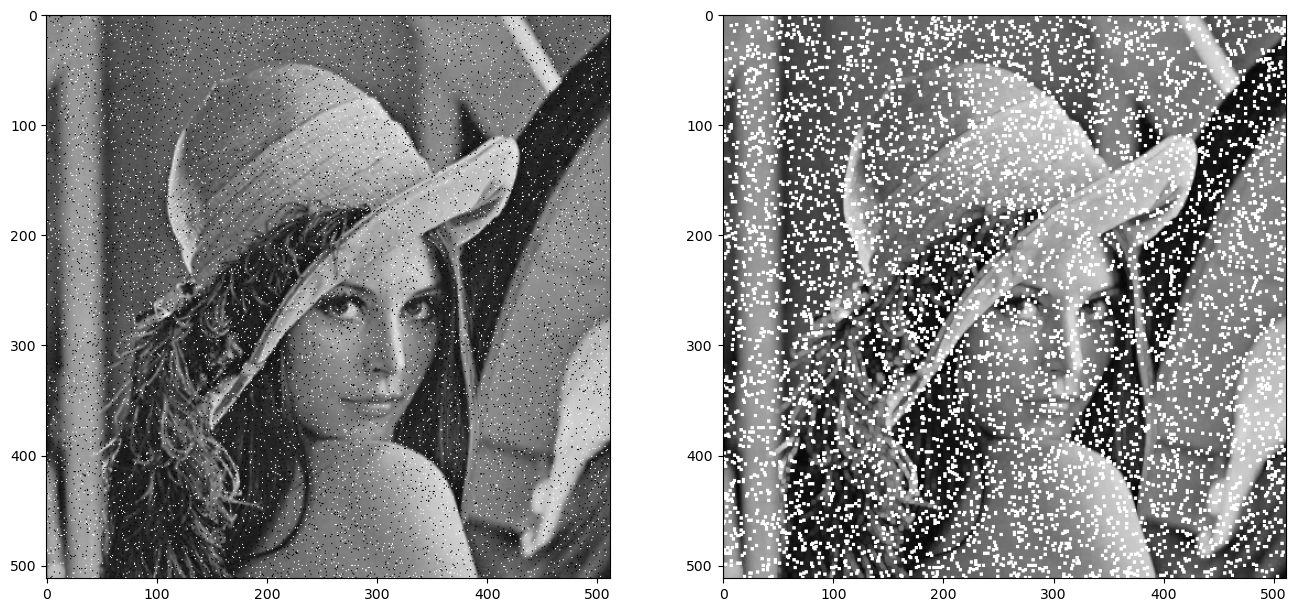

In [77]:
noise_img = util.random_noise(img, mode = 's&p')
noise_img = img_as_ubyte(noise_img)
nimg = filters.rank.maximum(noise_img, footprint=footprint)
f, ax = plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(noise_img, cmap='gray')
ax[1].imshow(nimg, cmap='gray')

# Filtro da mediana

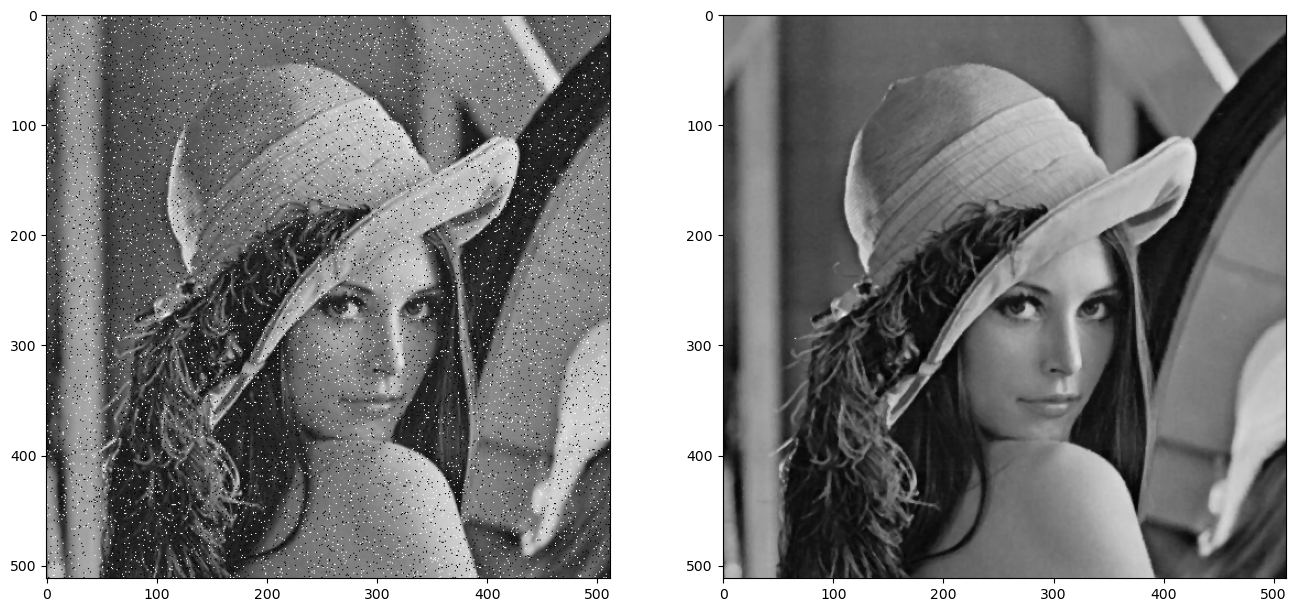

In [78]:
noise_img = util.random_noise(img, mode = 's&p')
noise_img = img_as_ubyte(noise_img)
nimg = filters.rank.median(noise_img, footprint=footprint)
f, ax = plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(noise_img, cmap='gray')
ax[1].imshow(nimg, cmap='gray')

# Realce

In [79]:
from scipy import ndimage

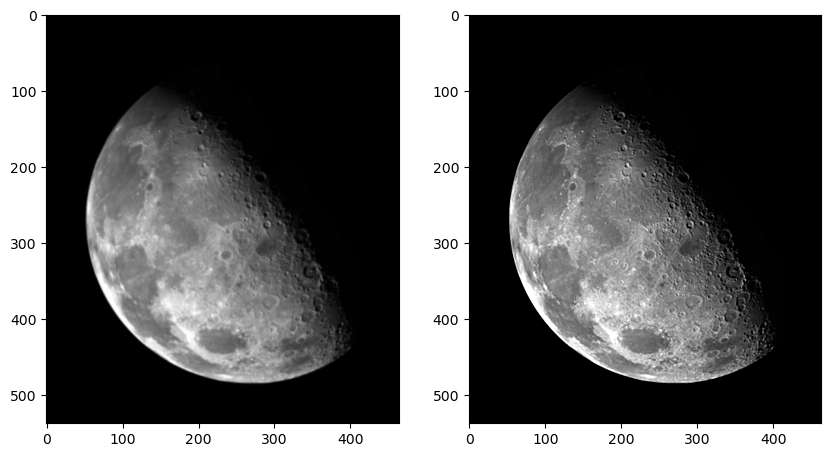

In [80]:
lua = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lua.png', as_gray=True)
w = np.array([[0, 1, 0],
                [1,-4, 1],
                [0, 1, 0]])
img_f = img_as_float(lua)
img_conv = ndimage.convolve(img_f, w)
nimg = img_f - img_conv
f, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img_f, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(nimg, cmap='gray', vmin=0, vmax=1)

# Mascara realce

[[-0.22222222 -0.22222222 -0.22222222]
 [-0.22222222  2.77777778 -0.22222222]
 [-0.22222222 -0.22222222 -0.22222222]]


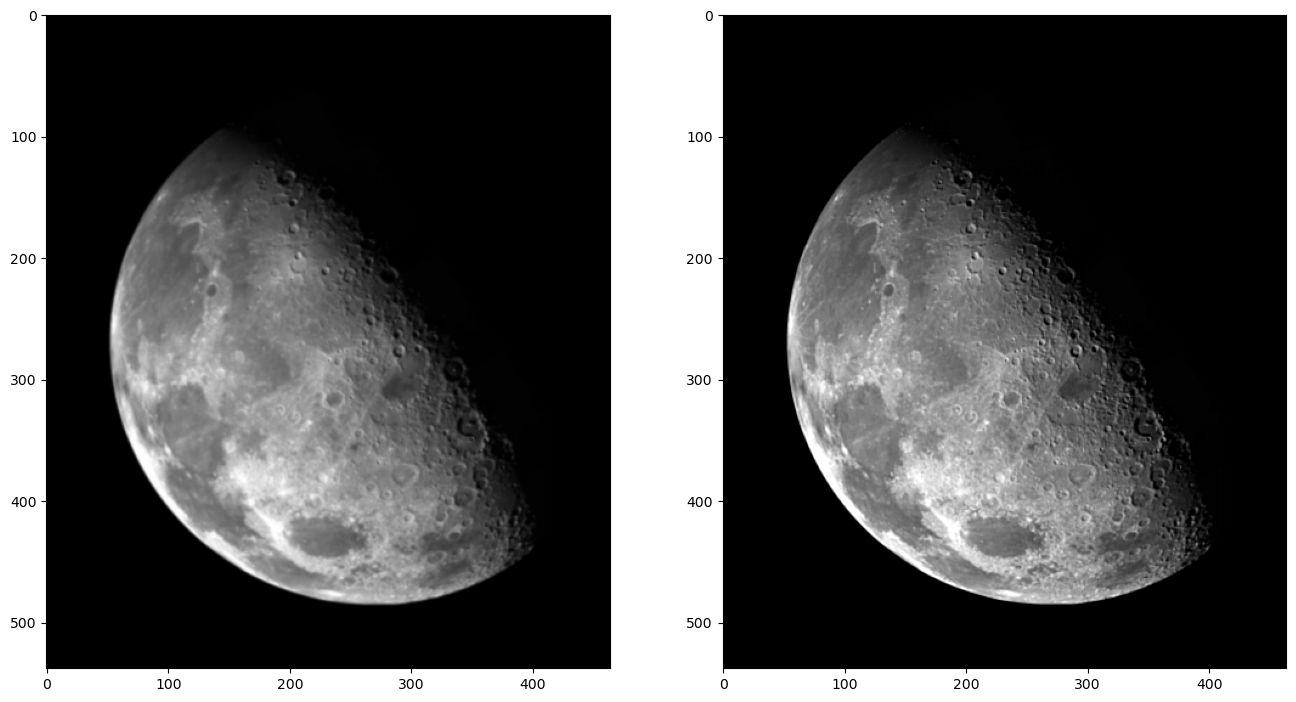

In [81]:
def mask_realce(G):
    mask = np.array([[-G/9, -G/9, -G/9],
                     [-G/9, (9+8*G)/9, -G/9],
                     [-G/9, -G/9, -G/9]])
    return mask

img_d = img_as_float64(lua)
M = mask_realce(2)
print(M)
img_sharp = ndimage.convolve(img_d, M)
f, ax = plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(img_d, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(img_sharp, cmap='gray', vmin=0, vmax=1)

Text(0.5, 1.0, 'Unsharp')

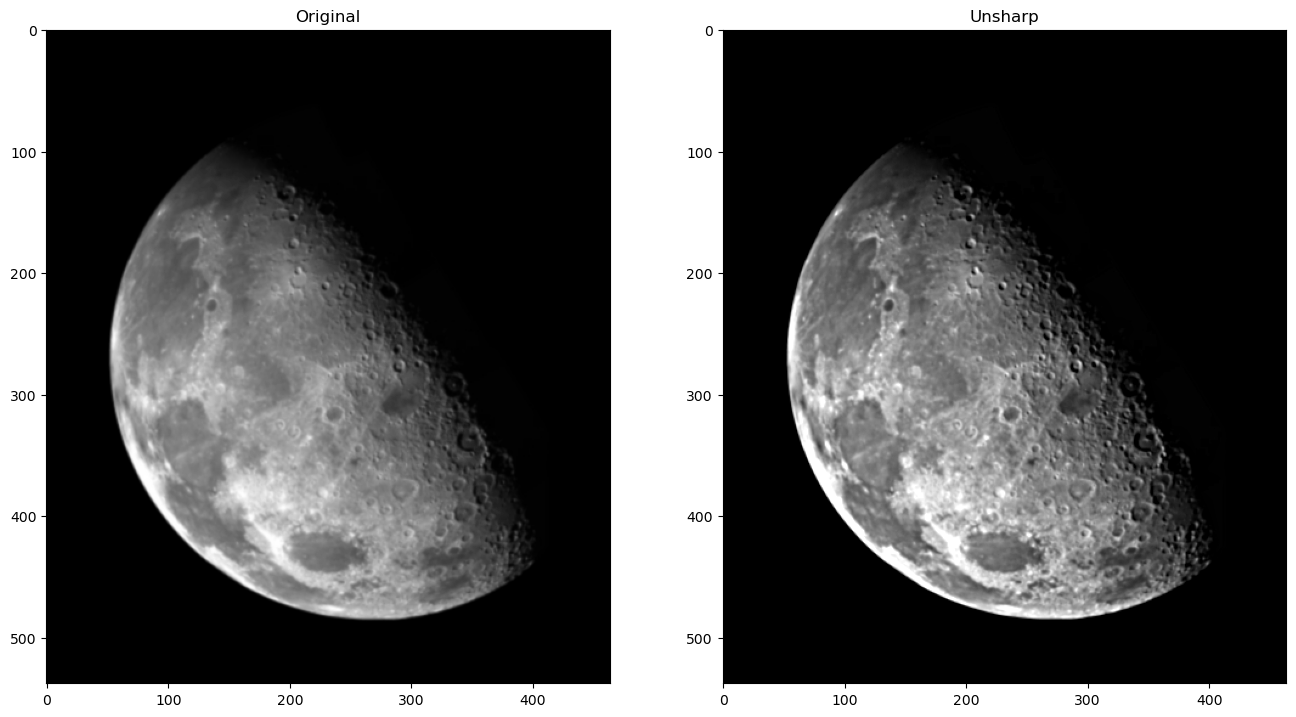

In [82]:
lua = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lua.png', as_gray=True)
lua_sharp = filters.unsharp_mask(lua, radius=4, amount=1.0)
f, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(lua, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(lua_sharp, cmap='gray')
ax[1].set_title('Unsharp')

Text(0.5, 1.0, 'Unsharp')

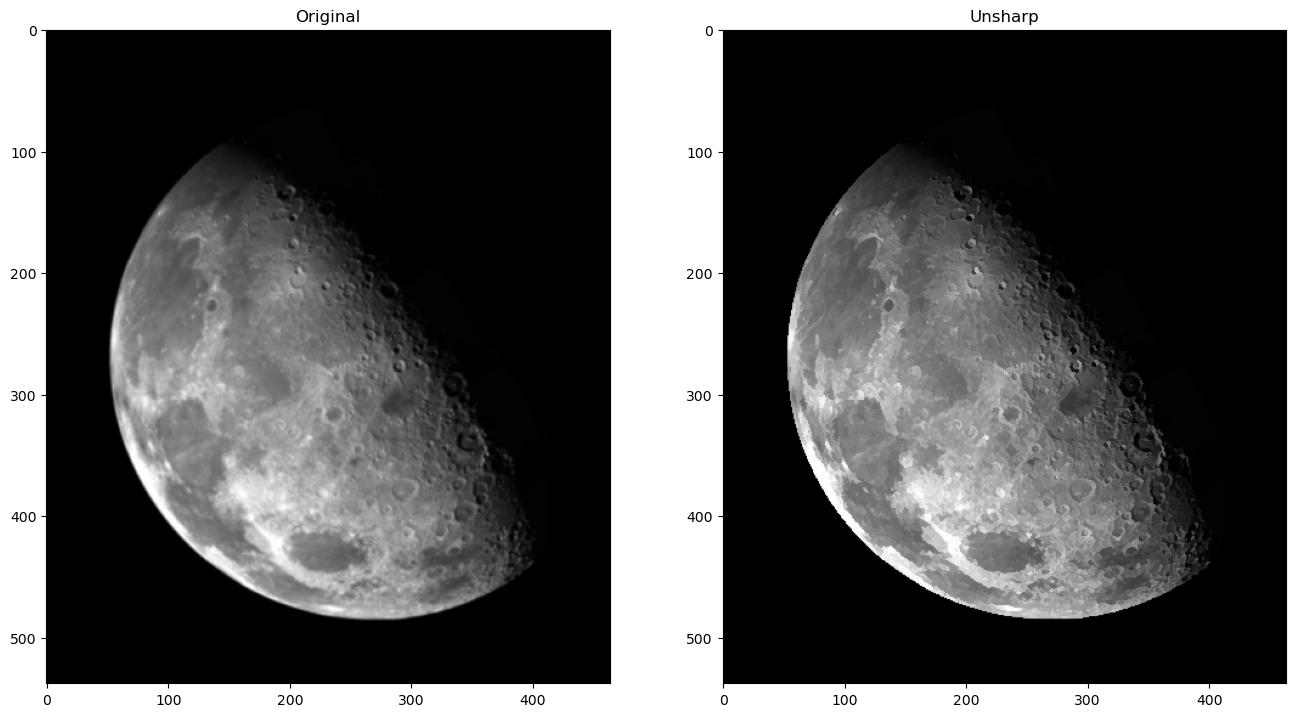

In [83]:
lua = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lua.png', as_gray=True)
footprint = np.ones( (3,3) )
lua_sharp = filters.rank.enhance_contrast(lua, footprint=footprint)
f, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(lua, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(lua_sharp, cmap='gray')
ax[1].set_title('Unsharp')

2
2


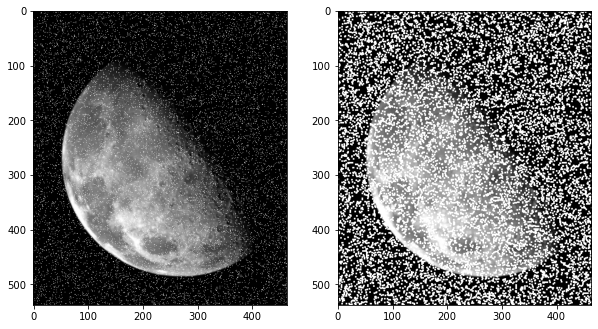

In [16]:
footprint = np.ones( (3,3) )
lua = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lua.png', as_gray=True)
lua2 = util.random_noise(lua, mode = 'salt')
print(lua2.ndim)
print(footprint.ndim)
nimg5 = ndimage.generic_filter(lua2, np.max, footprint=footprint)

f, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(lua2, cmap='gray')
ax[1].imshow(nimg5, cmap='gray')

## Métricas de Qualidade de Imagens

### Erro médio absoluto

In [66]:
def MAE(f, g):
    dif = np.abs(f-g)
    return np.mean(dif)

### Erro médio quadrático

In [67]:
def MSE(f, g):
    dif = (f-g)**2
    return np.mean(dif)

### Signal-to-Noise

In [68]:
def snr(f, g):
    num = np.sum( f**2 )
    deno = np.sum( (f-g)**2 )
    return 10*np.log10(num/deno)

### Coeficiente de correlação

In [69]:
def coef_correlacao(f, g):
    u_f = np.mean(f)
    u_g = np.mean(g)
    num = np.sum( (f - u_f) * (g - u_g) )
    deno = np.sum( (f - u_f)**2 ) * np.sum( (g - u_g)**2 )
    return num / np.sqrt(deno)